<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/Gradient_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [ ]:
from torchvision import transforms,datasets

In [ ]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,16)
        self.fc2=nn.Linear(16,16)
        self.fc3=nn.Linear(16,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1 )
        
net=Net()

#summary(net,(1,784))

optimizer=optim.Adam(net.parameters(),lr=0.001)
losses=[]
train_counter=[]
EPOCHS=1
count=0
final_weights={}
norm_list = []

for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        losses.append(loss)
        loss.backward()
        total_norm = 0
        for p in net.parameters(): # parameters include the biases!
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
        total_norm = total_norm ** (1. / 2)
        norm_list.append(total_norm)
        optimizer.step()
        train_counter.append((count*64) + ((epoch-1)*len(trainset.dataset)))
        count=count+1

Text(0.5, 0, 'Epochs')

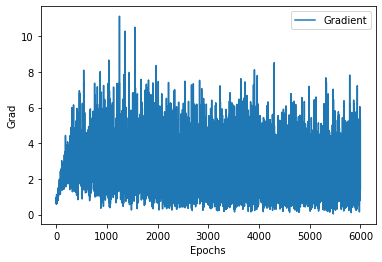

In [17]:
import matplotlib.pyplot as plt
plt.plot(norm_list,label='Gradient')
plt.legend()
plt.ylabel('Grad')
plt.xlabel('Epochs')


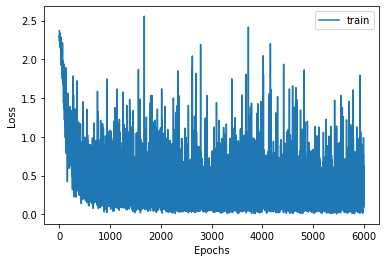

In [18]:
plt.plot(losses,label='train')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()